## Lab5

- 姓名：于洋淼
- 学号：2113644
- 专业：物联网工程

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

### 读取样本

In [2]:
# Read data.dat
datas = pd.read_csv("data.dat", sep=" ", header=None)
X = datas.values.astype(float)

# Read label.dat
labels = pd.read_csv("label.dat", header=None)
y = labels.values.astype(int)
y = y.reshape(-1)


## 基本要求

### 绘制散点图

In [3]:
# 绘制散点图
def plot_clusters(X, y):
    # 为每个聚类创建散点图
    unique_labels = np.unique(y)
    for label in unique_labels:
        # 获取当前聚类的数据点
        cluster_points = X[y == label]
        # 绘制数据点
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {label}')

    plt.legend()
    plt.show()


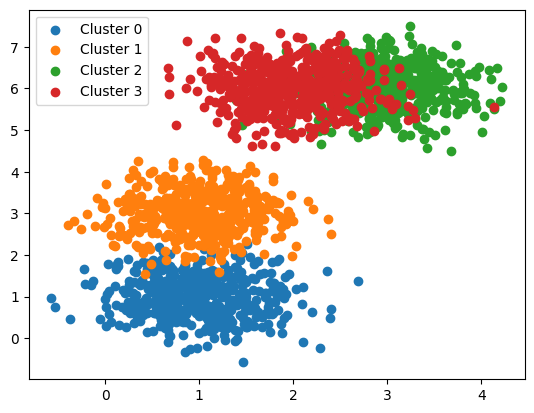

In [4]:
# 绘制原始数据点
plot_clusters(X, y)

### 层次聚类算法

In [5]:
# 因为类中需要调用averageLinkage,所以提前声明
def averageLinkage(X):
    pass

class AgglomerativeClustering:
    def __init__(self):
        self.steps = [] # 记录合并过程

    def fit(self, datas, method):
        self.dataCnt = datas.shape[0]
        MAX_NUM = float('inf')

        # 计算各个点之间的距离
        allDist = np.zeros((self.dataCnt, self.dataCnt))
        for i in range(self.dataCnt):
            for j in range(i):
                allDist[i][j] = allDist[j][i] = np.sum((datas[i] - datas[j]) ** 2)

        setList = [[i] for i in range(self.dataCnt)]
        clusterCount = self.dataCnt
        # 聚类间距离矩阵
        clusterDist = np.zeros((self.dataCnt, self.dataCnt)) + MAX_NUM
        clusterNum = np.zeros(2000)

        for i in range(clusterCount):
            clusterNum[i] = 1
            for j in range(i + 1, clusterCount):
                clusterDist[i][j] = clusterDist[j][i] = allDist[i][j]

        while clusterCount != 1:
            # 找到最相似的两个聚类
            res = np.argmin(clusterDist)
            dest, src = int(res / clusterCount), res % clusterCount
            self.steps.append((setList[dest][0], setList[src][0]))
            # 更新矩阵
            if method == averageLinkage:
                modify = method(clusterDist[[dest, src]], clusterNum[dest], clusterNum[src])
            else:
                modify = method(clusterDist[[dest, src]])
            clusterDist[dest] = modify
            clusterDist[:, dest] = modify
            clusterDist = np.delete(clusterDist, src, axis=0)
            clusterDist = np.delete(clusterDist, src, axis=1)
            clusterDist[dest][dest] = MAX_NUM
            # 更新权重
            clusterNum[dest] += clusterNum[src]
            clusterNum = np.delete(clusterNum, src)
            # 更新聚类
            setList[dest] = setList[dest] + setList[src]
            del setList[src]
            clusterCount -= 1

    def label(self, k):
        root = list(range(self.dataCnt))

        def find_root(n):
            # 查找根节点
            if root[root[n]] == root[n]:
                return root[n]
            root[n] = find_root(root[n])
            return root[n]

        for i in range(self.dataCnt - k):
            src, dest = self.steps[i]
            # 将目标节点的根节点设置为源节点的根节点
            root[find_root(dest)] = find_root(src)

        cluster, clusterNum = [0 for i in range(self.dataCnt)], 0

        for i in range(self.dataCnt):
            if i == root[i]:
                # 如果节点是根节点，则将其标记为新的簇
                clusterNum += 1
                cluster[i] = clusterNum

        for i in range(self.dataCnt):
            if i != root[i]:
                # 如果节点不是根节点，则将其标记为与其根节点相同的簇
                cluster[i] = cluster[find_root(i)]

        return cluster

In [6]:
# 实现single-linkage层次聚类算法
def singleLinkage(X):
    clusters = []
    for i in range(len(X[0])):
        clusters.append(min(X[0][i], X[1][i]));
    return clusters

# 实现complete-linkage层次聚类算法
def completeLinkage(X):
    clusters = []
    for i in range(len(X[0])):
        clusters.append(max(X[0][i], X[1][i]));
    return clusters

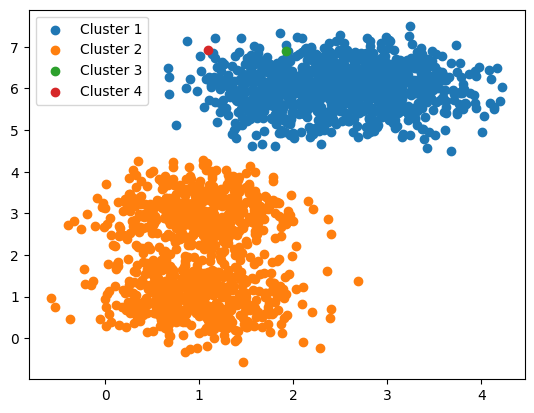

In [7]:
# 绘制single-linkage层次聚类算法的聚类结果
model = AgglomerativeClustering()
model.fit(X, singleLinkage)
n_clusters = 4 
clusters = model.label(n_clusters)
plot_clusters(X, clusters)

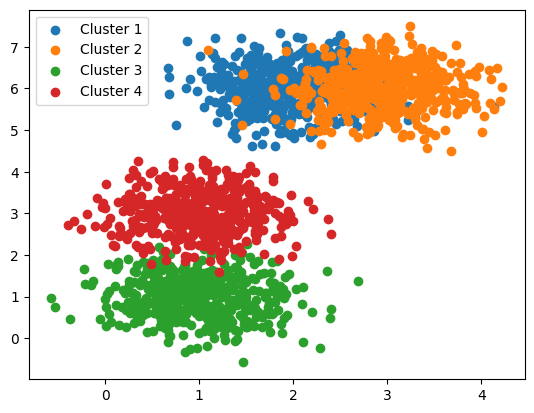

In [8]:
# 绘制complete-linkage层次聚类算法的聚类结果
model = AgglomerativeClustering()
model.fit(X, completeLinkage)
n_clusters = 4
clusters = model.label(n_clusters)
plot_clusters(X, clusters)

## 中级要求

In [9]:
# 实现average-linkage层次聚类算法
def averageLinkage(X, c_des, c_src):
    clusters = []
    for i in range(len(X[0])):
        # 计算平均连接的聚类中心
        new_cluster = (c_des * X[0][i] + c_src * X[1][i]) / (c_des + c_src)
        clusters.append(new_cluster)
    return clusters

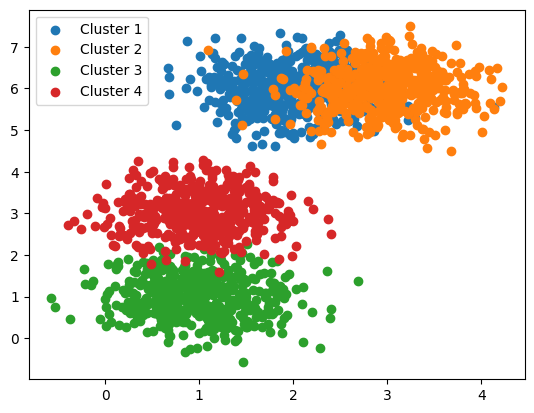

In [10]:
# 绘制average-linkage层次聚类算法的聚类结果
model = AgglomerativeClustering()
model.fit(X, averageLinkage)
n_clusters = 4
clusters = model.label(n_clusters)
plot_clusters(X, clusters)

## 提高要求

- Single-Linkage：使用两个簇中距离最近的两个样本之间的距离作为簇之间的距离。它的计算方式是找到两个簇中距离最近的样本对，然后将这两个簇定义为合并后的簇。
- Complete-Linkage：使用两个簇中距离最远的两个样本之间的距离作为簇之间的距离。它的计算方式是找到两个簇中距离最远的样本对，然后将这两个簇定义为合并后的簇。
- Average-Linkage：使用两个簇中所有样本对之间的平均距离作为簇之间的距离。它的计算方式是计算两个簇中所有样本对之间的距离的平均值，然后将这两个簇定义为合并后的簇。这种方法的结果通常介于Single-Linkage和Complete-Linkage之间，可以在某些情况下更好地平衡两者。

按照上述三种方法进行层次聚类，得到的结果如上所示。可以看到single-linkage对离群点过于敏感，导致聚类结果错误明显。complete-linkage和average-linkage对离群点的敏感程序相对较小，聚类结果较为准确。

## 拓展要求

n_clusters = 2
singleLinkage:


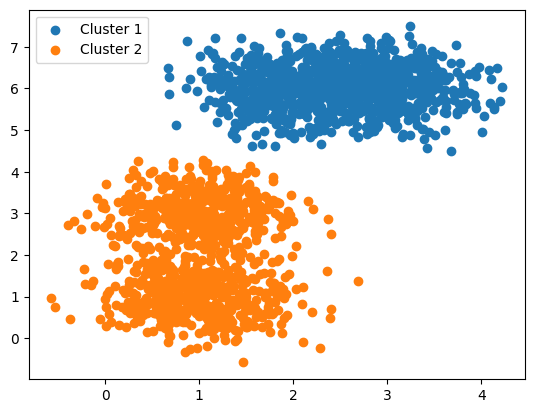

completeLinkage:


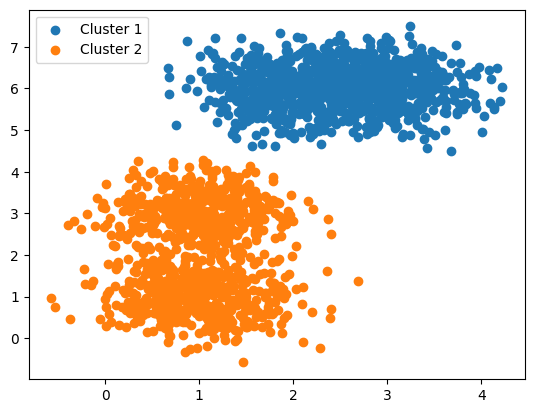

averageLinkage:


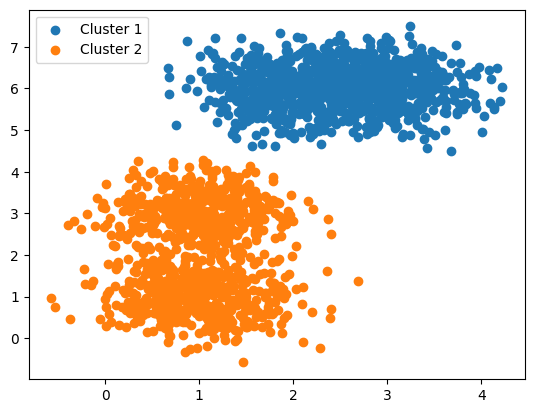

n_clusters = 3
singleLinkage:


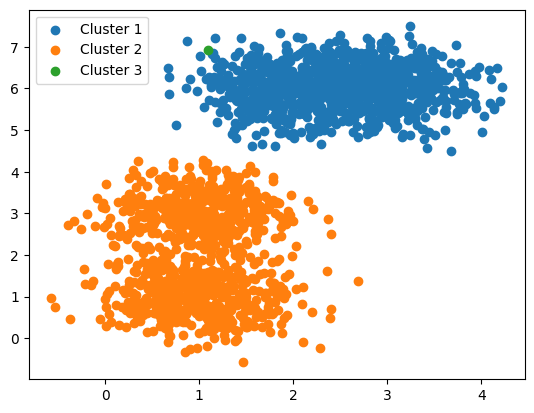

completeLinkage:


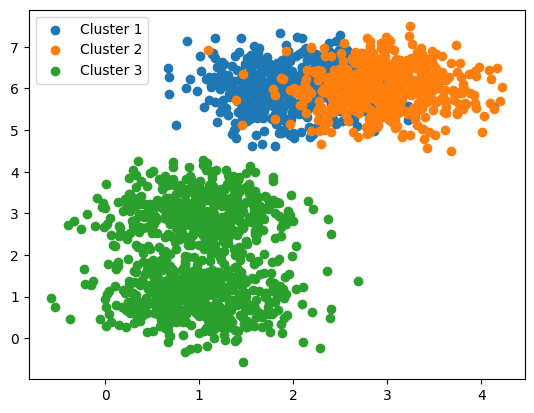

averageLinkage:


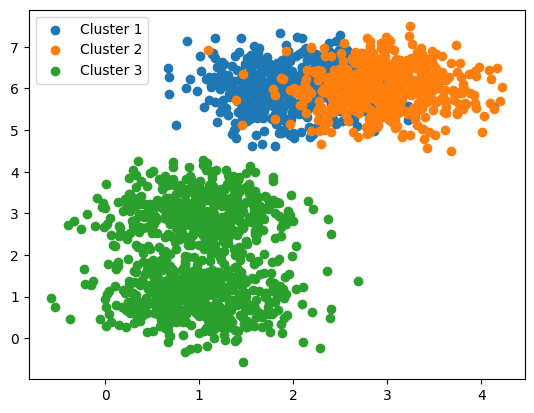

n_clusters = 4
singleLinkage:


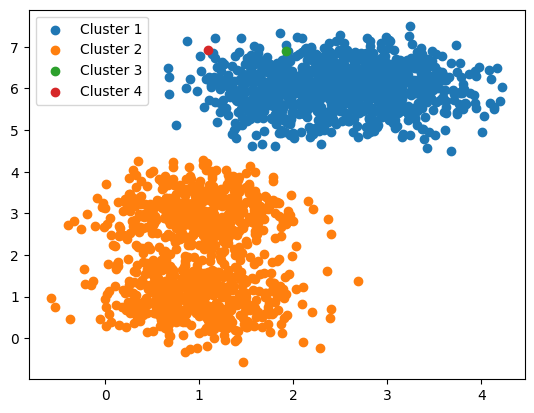

completeLinkage:


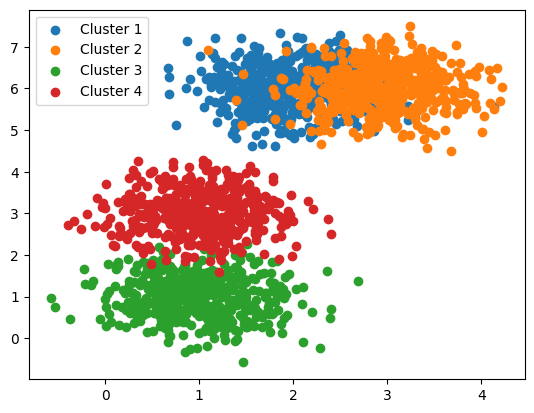

averageLinkage:


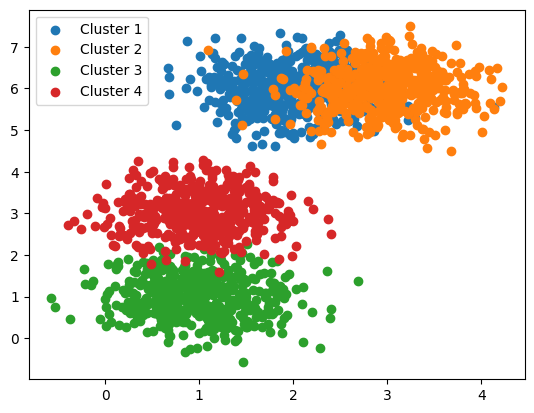

n_clusters = 5
singleLinkage:


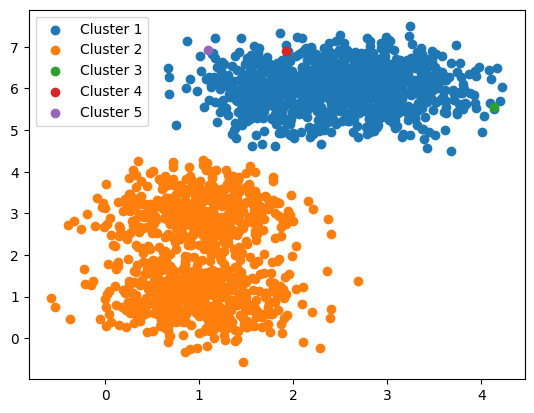

completeLinkage:


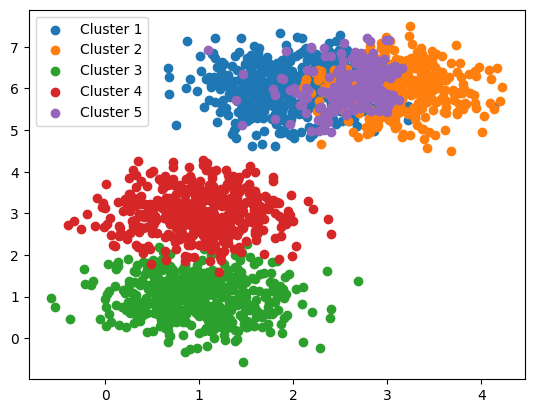

averageLinkage:


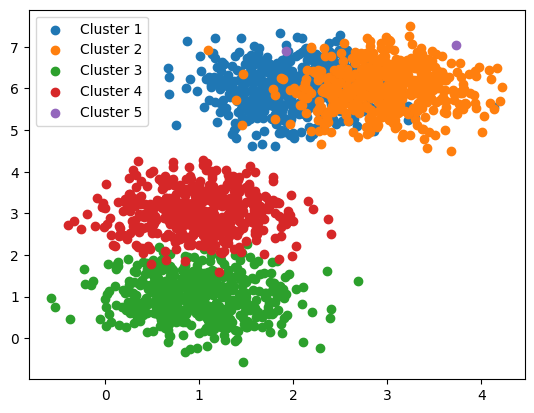

n_clusters = 6
singleLinkage:


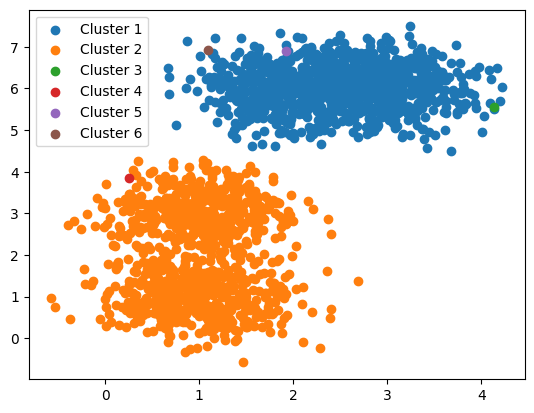

completeLinkage:


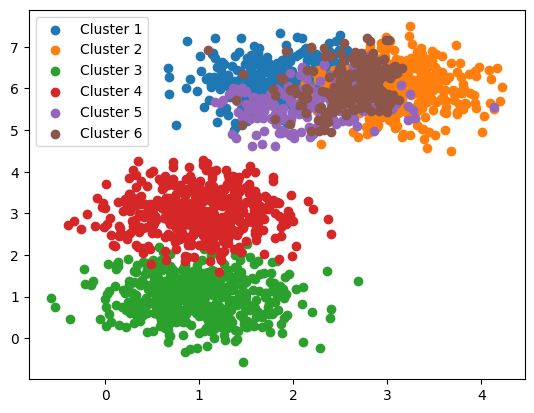

averageLinkage:


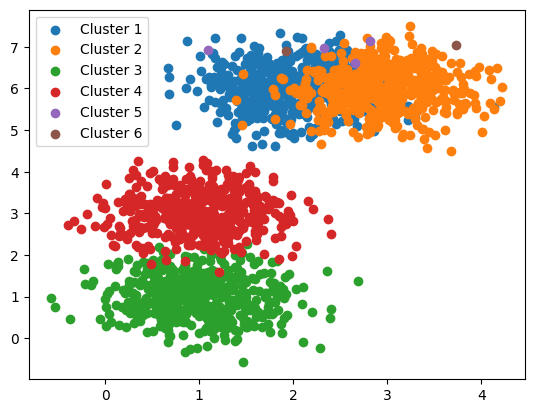

In [11]:
n_clusters_list = [2, 3, 4, 5, 6]

for n_clusters in n_clusters_list:
    print(f"n_clusters = {n_clusters}")

    print('singleLinkage:')
    model = AgglomerativeClustering()
    model.fit(X, singleLinkage)
    clusters = model.label(n_clusters)
    plot_clusters(X, clusters)

    print('completeLinkage:')
    model = AgglomerativeClustering()
    model.fit(X, completeLinkage)
    clusters = model.label(n_clusters)
    plot_clusters(X, clusters)

    print('averageLinkage:')
    model = AgglomerativeClustering()
    model.fit(X, averageLinkage)
    clusters = model.label(n_clusters)
    plot_clusters(X, clusters)

    print('===========================================')


当分类簇数量增加时，averangelinkage算法结果要优于另外两种算法，另外single和complete更适用于分类簇较少，分类种类较少的数量集，此时准确率会较高。而当数据集越来越复杂时，建议使用averangelinkable算法进行分类

从上图中可以看出，当分类簇数量增加时，average-linkage算法结果要优于另外两种算法。single-linkage对离群点过于敏感，聚类结果明显错误；complete-linkage过于关注球形簇，当分类簇数量增加时，会出现错误簇；average-linkage算法在各种分类簇数量下表现都不错。

结论：
- Single-Linkage适用于发现具有连续性的簇，对离群点敏感。
- Complete-Linkage适用于发现紧凑的、球形的簇，对离群点不敏感。
- Average-Linkage在综合了Single-Linkage和Complete-Linkage的优点，可以用于发现不同形状和大小的簇。